lets preapare neuron network that recognizes hand-writtenn numbers from picture

In [15]:
#import nesery libraries
import io
import pandas as pd
from google.colab import files
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

import matplotlib.pyplot as plt
import random
import numpy as np
import time

Lets import mnist database 

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


    X_Data is represented by 3D matrix - 70k of 2D Arrays
    each 2D array represents a picture 28x28 pixels

In [4]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


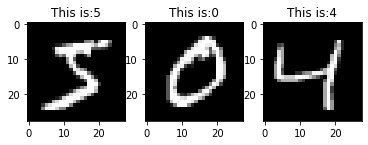

In [5]:
for i in range(3):  
  plt.subplot(1,3,i+1)
  plt.title("This is:"+str(Y_train[i]) )
  plt.imshow(X_train[i], cmap='gray')
plt.show()

To use this in model I have to change the input to 1D arrays

In [6]:
X_train = X_train.reshape((60000,28**2))
X_test = X_test.reshape((-1,28**2))

Let's take a closer loot at that data

In [7]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

Model works better when input values are between 0 and 1. So we can scale it down by deviding it

In [8]:
X_train = X_train/256
X__test = X_test/256

    Multi-layer Perceptron classifier, This model optimizes the log-loss function
    'adam' solver-- works well with large datasets
    'relu' activation returns f(x) = max(0, x)
    hidden_layer_size represents the number of neurons in the ith hidden layer.

In [9]:
model = MLPClassifier(solver='adam', activation= 'relu',hidden_layer_sizes=(100,))

Now we can fit imported data to the model

In [10]:
model.fit(X_train, Y_train)

MLPClassifier()

In [11]:
predictions = model.predict(X_test)

In [12]:
Accuracy = accuracy_score(Y_test, predictions )

We have obtained almost 98% of accuracy, thats a very good outcome

In [13]:
Accuracy

0.9765

In the next step let's check if that model can read symbol created by me

but what happened with this wrong 2%?

In [18]:
confusion_matrix(Y_test,predictions) 

array([[ 969,    1,    1,    0,    2,    0,    2,    3,    1,    1],
       [   0, 1125,    4,    1,    0,    0,    0,    1,    4,    0],
       [   4,    2, 1011,    2,    3,    0,    1,    5,    4,    0],
       [   0,    0,    4,  989,    1,    4,    0,    6,    2,    4],
       [   1,    1,    3,    0,  963,    1,    5,    1,    0,    7],
       [   4,    1,    0,   17,    1,  858,    7,    1,    3,    0],
       [   3,    3,    2,    2,    4,    2,  940,    1,    1,    0],
       [   1,    5,   11,    6,    2,    0,    0, 1001,    0,    2],
       [   2,    1,    9,   14,    4,    2,    3,    3,  932,    4],
       [   2,    3,    0,    7,   10,    3,    1,    5,    1,  977]])

Column represents what this picture really was (number), row represents what model predicted it was. We can se that model wrongly predicted what was a picture of number 3 (49 times). Maybe improving the resolution of pictures would get rid of this problem. 

In [19]:
#Lets import hand made picture

from PIL import Image
import io
uploaded = files.upload()

In [ ]:
im =  Image.open(io.BytesIO(uploaded['piec.png'])) 

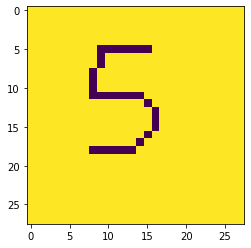

In [ ]:
plt.imshow(im)

In [ ]:
print(np.array(im) )

[[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255   0   0   0   0   0   0   0 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255 255   0 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255 255 255 255]
 [255 255 255 255 255 255 255 255   0 255 255 255 255 255 255 25

Again, to preapare the data, I have to store this as 1D Array, with values between 0-1. And also in this file, colors are reversed white <-> black

In [ ]:
im = np.array(im).reshape(-1)

swap_dict={0 : 1,
           255 : 0}
im2 = [swap_dict[el] for el in im]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
print(model.predict([im]) )

[5]


So this model succesfully read this picture